# Localized Covid Data for Santa Barbara, CA
All data updated live from John Hopkins University at https://github.com/CSSEGISandData/COVID-19

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.close('all')

In [2]:
#Change these Constants for a different perspective
STATE = 'California'
COUNTY = 'Santa Barbara'

In [3]:
#data pulled from John Hopkins University at https://github.com/CSSEGISandData/COVID-19
confirmed_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
dead_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")

In [4]:
confirmed_df.columns = map(str.lower, confirmed_df.columns)
dead_df.columns = map(str.lower, dead_df.columns)
confirmed_df = confirmed_df.rename(columns = { 'province_state': 'state', 'admin2': 'county'})
dead_df = dead_df.rename(columns = {'province_state':'state', 'admin2':'county'})
today = dead_df.columns[-1]

In [5]:
def get_state(df, state):
    return df[df['state'] ==state]

In [6]:
def get_county(df, state, county):
    start_ndx = 100
    df = get_state(df, state)
    df = df[df['county'] == county]
    df = df.iloc[:,start_ndx:]
    return df

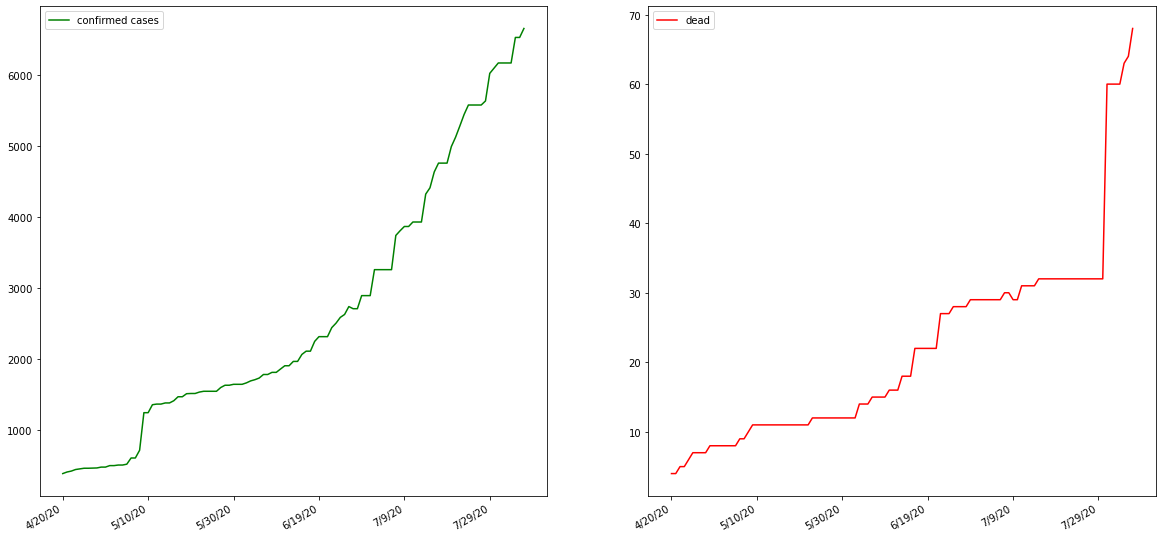

In [7]:
ca_dead_df = get_county(dead_df, STATE, COUNTY).T
ca_conf_df = get_county(confirmed_df, STATE, COUNTY).T
#need to rename the columns
ca_conf_df = ca_conf_df.rename(columns={ca_conf_df.columns[0]: 'confirmed cases'})
ca_dead_df = ca_dead_df.rename(columns={ca_dead_df.columns[0]: 'dead'})
combined_df = pd.concat([ca_conf_df, ca_dead_df], axis=1, join = 'inner')
my_colors = ['g', 'r']*5
combined_df.plot(subplots=True, figsize=(20,10), layout=(1,2), color=my_colors)
plt.show()

### To Date:

In [8]:
combined_df.tail(1)

,confirmed cases,dead
8/6/20,6652,68


# The Ten Most Affected Counties in The State

In [19]:
state_conf = get_state(confirmed_df, STATE)
state_dead = get_state(dead_df, STATE)
state_tot = pd.merge(state_dead.rename(columns={today:'dead'}), state_conf.rename(columns={today:'confirmed'}), on ='county')
state_tot = state_tot[['county', 'confirmed', 'dead']]
state_tot = state_tot.sort_values(by = ['confirmed'], ascending = False).head(10)

In [18]:
import seaborn as sns
cm = sns.light_palette("black", as_cmap=True)
styled_state_tot = state_tot.style.background_gradient(cmap=cm)
styled_state_tot

,county,confirmed,dead
18,Los Angeles,201200,4869
32,Riverside,39741,770
29,Orange,38711,697
35,San Bernardino,34635,490
36,San Diego,31127,583
14,Kern,21724,152
9,Fresno,16625,157
0,Alameda,12884,206
38,San Joaquin,12119,192
42,Santa Clara,11336,196
